In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [30]:
without_index_df = pd.read_csv('without_index.csv')
without_index_df['Using Index'] = False
with_index_df = pd.read_csv('with_index.csv')
with_index_df['Using Index'] = True

df = without_index_df.append(with_index_df)
df

,Connections,Latency AVG [sec],Throughput [Requests/sec],Using Index
0,1,1530.00,0.57,False
1,10,6070.00,1.23,False
2,100,15200.00,1.23,False
3,1000,19430.00,1.08,False
0,1,308.26,4.16,True
1,10,2020.00,27.06,True
2,100,1360.00,65.46,True
3,1000,6350.00,26.86,True


# Latency

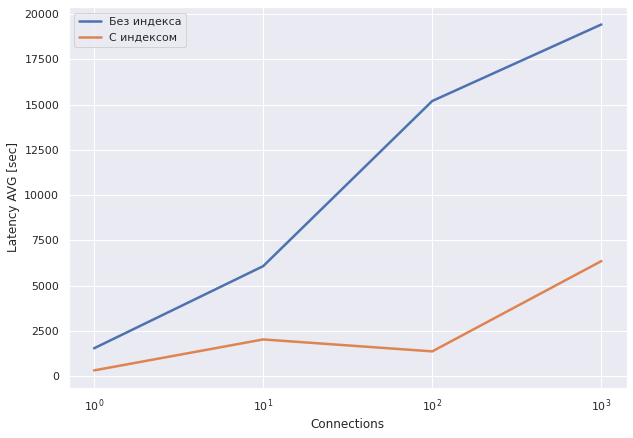

In [33]:
sns.set(style='darkgrid')
ax = sns.lineplot(
    x='Connections',
    y='Latency AVG [sec]',
    hue='Using Index',
    linewidth=2.5,
    data = df
)

ax.legend(['Без индекса', 'С индексом'])
ax.set_xscale('log')

# Throughput

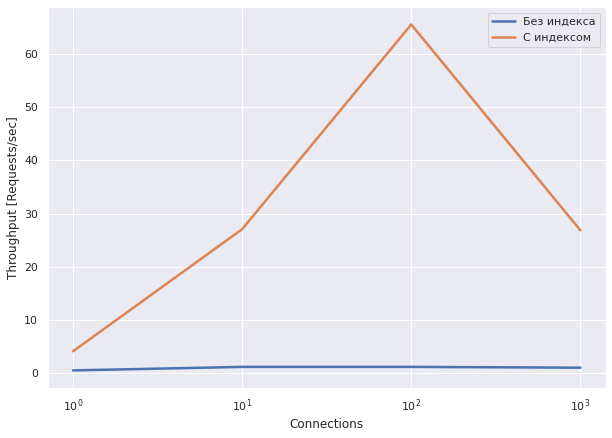

In [34]:
sns.set(style='darkgrid')
ax = sns.lineplot(
    x='Connections',
    y='Throughput [Requests/sec]',
    hue='Using Index',
    linewidth=2.5,
    data = df
)

ax.legend(['Без индекса', 'С индексом'])
ax.set_xscale('log')

# SQL Explain

### Без индекса

In [35]:
without_index_df = pd.read_csv('without_index_sql_explain.csv')
without_index_df

,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,u,NaN,ALL,NaN,NaN,NaN,NaN,1069068,1.23,Using where; Using temporary; Using filesort
1,1,SIMPLE,f,NaN,ALL,NaN,NaN,NaN,NaN,8,100.00,Using where; Using join buffer (Block Nested L...


### С индексом

In [36]:
with_index_df = pd.read_csv('with_index_sql_explain.csv')
with_index_df

,id,select_type,table,partitions,type,possible_keys,key,key_len,ref,rows,filtered,Extra
0,1,SIMPLE,u,NaN,range,idx_ln_n,idx_ln_n,68.0,NaN,2320,11.11,Using index condition; Using temporary; Using ...
1,1,SIMPLE,f,NaN,ALL,NaN,NaN,NaN,NaN,8,100.00,Using where; Using join buffer (Block Nested L...
